In [1478]:
import numpy as np
import pandas as pd

In [1479]:
# Try multiple common encodings for CSV files
encodings_to_try = ['latin1', 'ISO-8859-1', 'cp1252', 'utf-8-sig']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv('spam.csv', encoding=encoding)
        print(f"Successfully read file with {encoding} encoding")
        break
    except UnicodeDecodeError:
        continue
    except Exception as e:
        print(f"Error with {encoding}: {str(e)}")
else:
    print("Failed to read with standard encodings, trying advanced methods...")
    try:
        # Binary read with error handling
        with open('spam.csv', 'rb') as f:
            content = f.read().decode('latin1', errors='ignore')
        df = pd.read_csv(StringIO(content))
        print("Successfully read with binary fallback method")
    except Exception as e:
        print(f"Final error: {str(e)}")
        raise

# Verify the data
print("\nFirst 3 rows:")
print(df.head(3))
print("\nColumn names:")
print(df.columns.tolist())

Successfully read file with latin1 encoding

First 3 rows:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  

Column names:
['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


In [1480]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3027,ham,You have got tallent but you are wasting.,NaN,NaN,NaN
2892,ham,K I'll be sure to get up before noon and see w...,NaN,NaN,NaN
5298,ham,I.ll hand her my phone to chat wit u,NaN,NaN,NaN
687,ham,"Dear,Me at cherthala.in case u r coming cochin...",NaN,NaN,NaN
559,ham,Aiyo... U always c our ex one... I dunno abt m...,NaN,NaN,NaN


In [1481]:
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [1482]:
# drop last 3 columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [1483]:
df.shape

(5572, 2)

## 1.Data Cleaning

In [1485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [1486]:
df.sample(5)

,v1,v2
471,ham,"How long has it been since you screamed, princ..."
1821,ham,I couldn't say no as he is a dying man and I f...
1215,ham,that would be good Û_ I'll phone you tomo lun...
1399,ham,You have registered Sinco as Payee. Log in at ...
997,ham,Not a lot has happened here. Feels very quiet....


In [1487]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2366,spam,Tone Club: Your subs has now expired 2 re-sub ...
1241,ham,"I want to show you the world, princess :) how ..."
936,ham,"Since when, which side, any fever, any vomitin."
784,ham,Dont think so. It turns off like randomlly wit...
2951,ham,Tell me whos this pls:-)


In [1488]:
# applying label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [1489]:
df['target'] = encoder.fit_transform(df['target'])

In [1490]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [1491]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [1492]:
# check for duplicate values
df.duplicated().sum()

403

In [1493]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [1494]:
df.duplicated().sum()

0

In [1495]:
df.shape

(5169, 2)

**2.EDA**

In [1497]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [1498]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

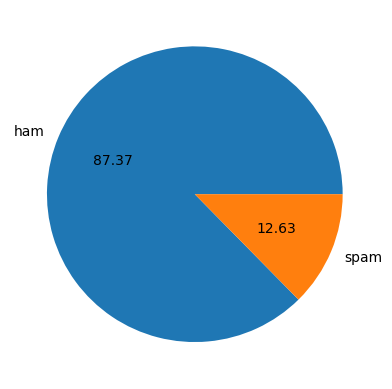

In [1499]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [1500]:
# Data is imbalanced 

In [1501]:
import nltk

In [1502]:
!pip install nltk

In [1503]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1504]:
df['num_characters'] = df['text'].apply(len)

In [1505]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [1506]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [1507]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [1508]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [1509]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [1510]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [1511]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [1512]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [1513]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

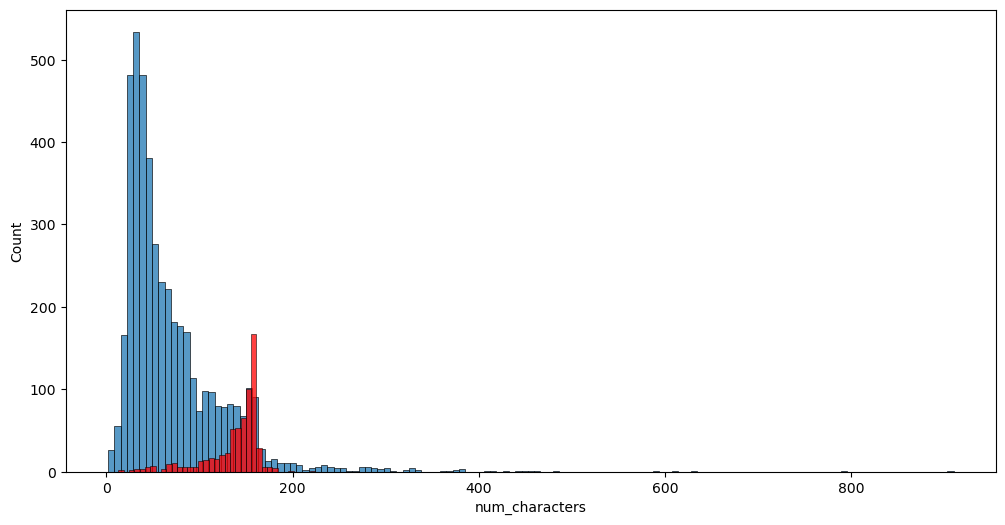

In [1514]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

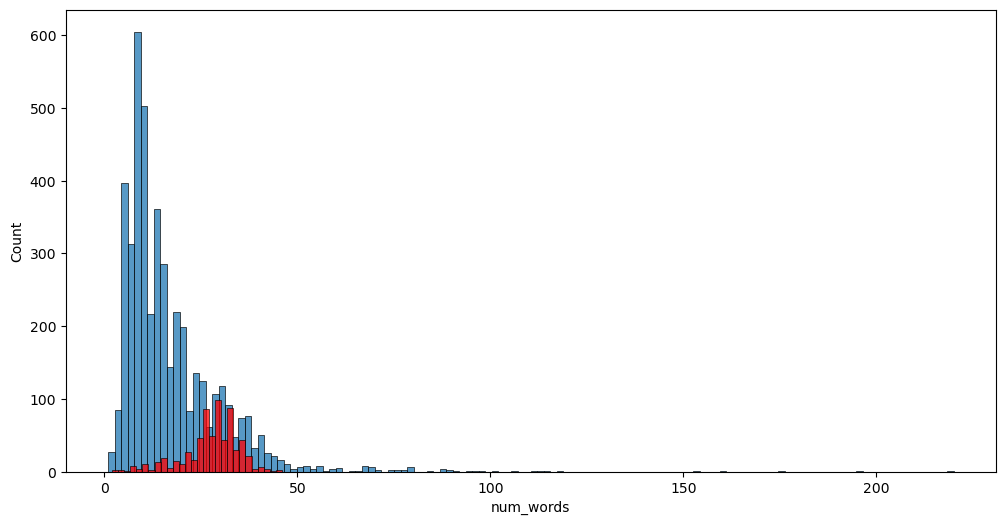

In [1515]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

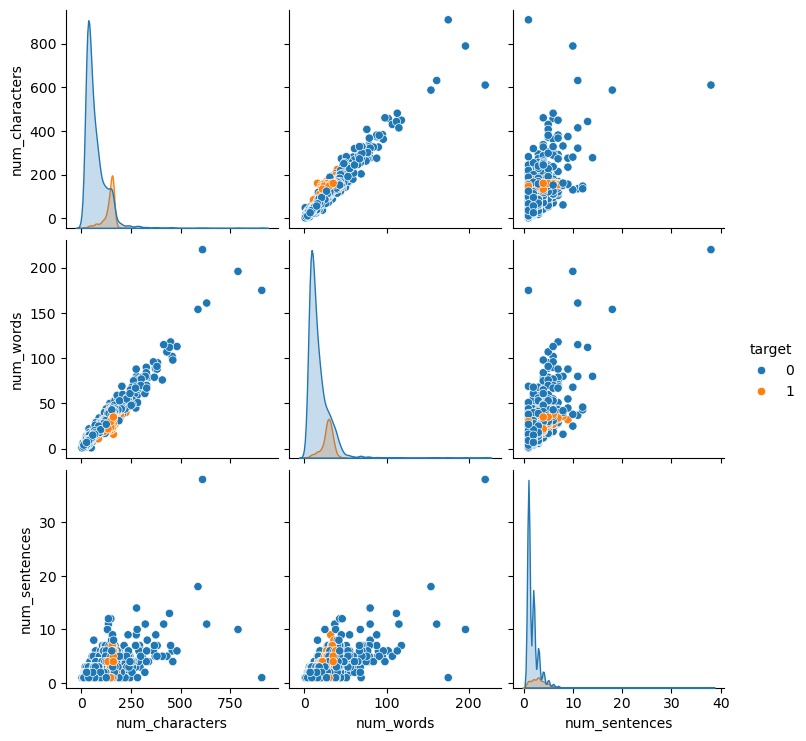

In [1516]:
sns.pairplot(df,hue='target')

<Axes: >

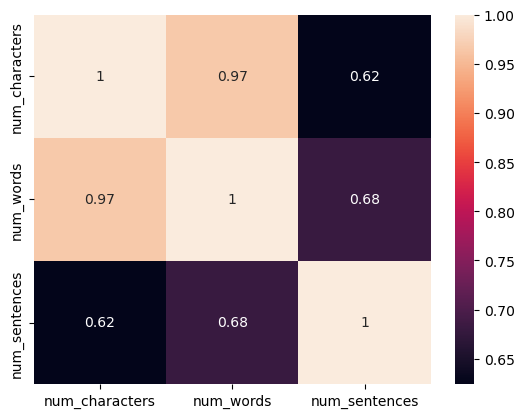

In [1517]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(df_numeric.corr(),annot=True)

**3.Data Preprocessing**
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* stemming

In [1519]:
import string
from nltk.corpus import stopwords

# Download the stopwords dataset if you haven't already
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1520]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [1521]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
       y.append(ps.stem(i))
            
    return " ".join(y)

In [1522]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [1523]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [1524]:
ps.stem('loving')

'love'

In [1525]:
df['transform_text'] = df['text'].apply(transform_text)

In [1526]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [1527]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1528]:
from wordcloud import WordCloud
wc =  WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [1529]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

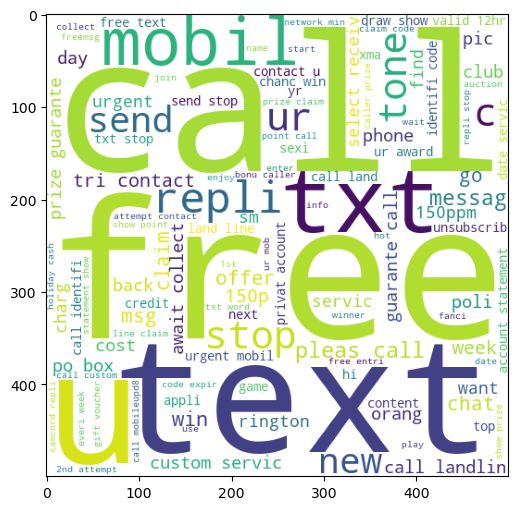

In [1530]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [1531]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

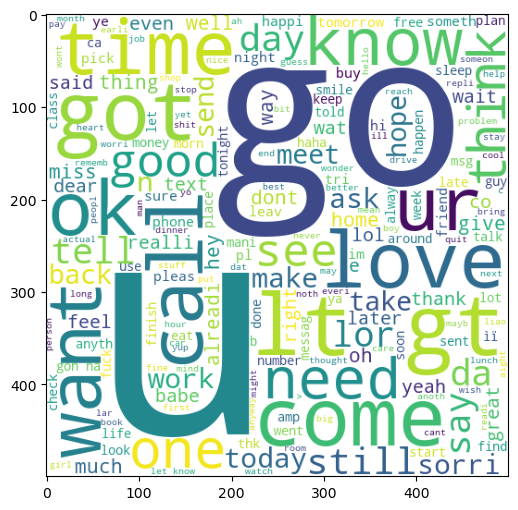

In [1532]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [1533]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [1534]:
print(df.columns.tolist())  # List all available columns

['target', 'text', 'num_characters', 'num_words', 'num_sentences', 'transform_text']


In [1535]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [1536]:
len(spam_corpus)

9939

In [1537]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

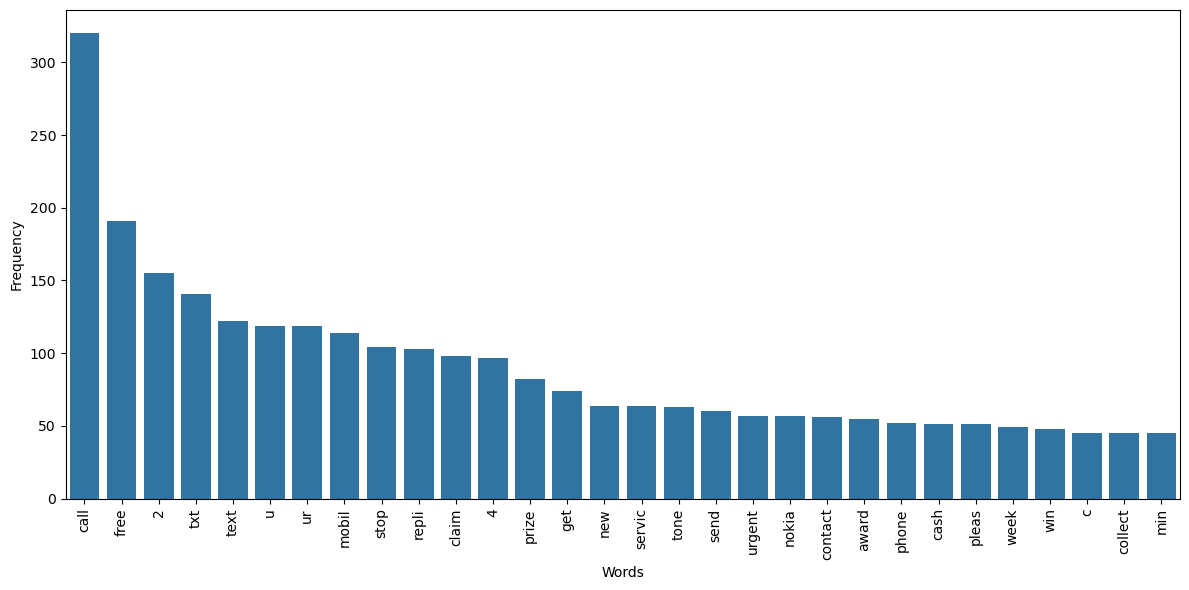

In [1538]:
from collections import Counter
# Get the top 30 most common words and their counts
word_counts = Counter(spam_corpus).most_common(30)

# Convert to DataFrame (automatically creates columns 0 and 1)
df_counts = pd.DataFrame(word_counts)

# Create the bar plot without changing column names
plt.figure(figsize=(12, 6))
sns.barplot(x=df_counts[0], y=df_counts[1])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [1539]:
print(df.columns.tolist())  # List all available columns

['target', 'text', 'num_characters', 'num_words', 'num_sentences', 'transform_text']


In [1540]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [1541]:
len(ham_corpus)

35404

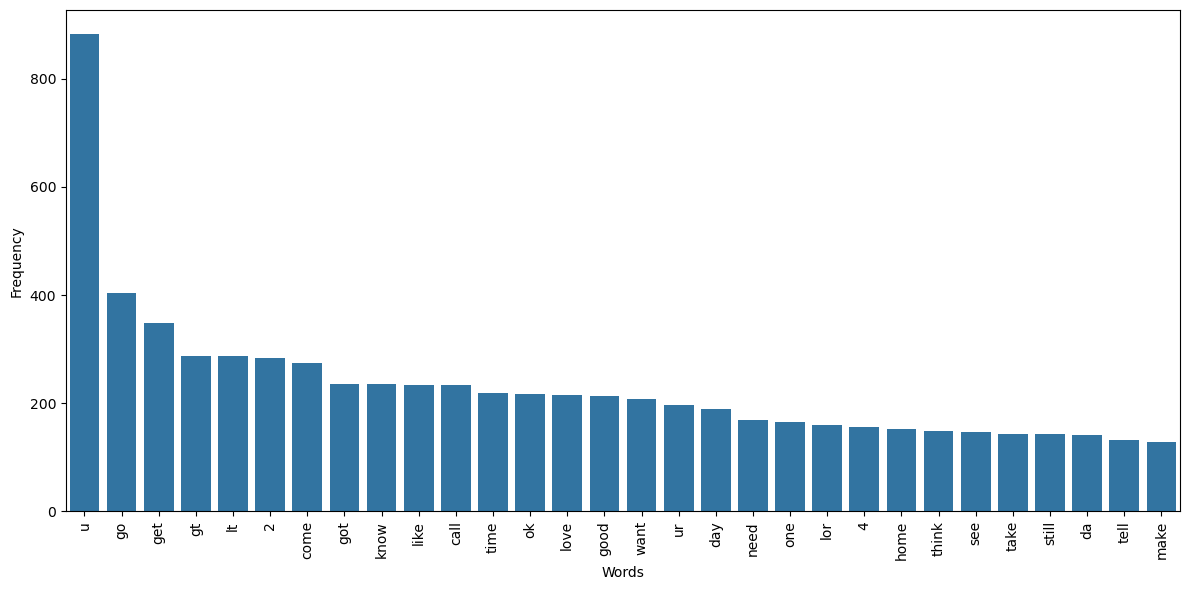

In [1542]:
# Get the top 30 most common words and their counts
word_counts = Counter(ham_corpus).most_common(30)

# Convert to DataFrame (automatically creates columns 0 and 1)
df_counts = pd.DataFrame(word_counts)

# Create the bar plot without changing column names
plt.figure(figsize=(12, 6))
sns.barplot(x=df_counts[0], y=df_counts[1])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [1543]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


**4.Model Building**

In [1545]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [1546]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [1547]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [1548]:
# appending the num_characters col to X
X =np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [1549]:
X.shape

(5169, 3001)

In [1550]:
y = df['target'].values

In [1551]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [1552]:
from sklearn.model_selection import train_test_split

In [1553]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [1554]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [1555]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [1687]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8907156673114119
[[807  89]
 [ 24 114]]
0.5615763546798029


In [1704]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9410058027079303
[[896   0]
 [ 61  77]]
1.0


In [1691]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [1559]:
# tfidf ---> MNB

In [1693]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [1695]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [1697]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC': etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [1699]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [1701]:
train_classifier(svc,X_train,y_train,X_test,y_test)

E:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.8665377176015474, 0.0)

In [1702]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy ",current_accuracy)
    print("precision ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

E:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For  SVC
Accuracy  0.8665377176015474
precision  0.0
For  KN
Accuracy  0.9264990328820116
precision  0.7627118644067796
For  NB
Accuracy  0.9410058027079303
precision  1.0
For  DT
Accuracy  0.9458413926499033
precision  0.8867924528301887
For  LR
Accuracy  0.9613152804642167
precision  0.9622641509433962
For  RF
Accuracy  0.9690522243713733
precision  0.9818181818181818


E:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy  0.9642166344294004
precision  0.9316239316239316
For  BgC
Accuracy  0.9661508704061895
precision  0.8992248062015504
For  ETC
Accuracy  0.9787234042553191
precision  0.9754098360655737
For  GBDT
Accuracy  0.9506769825918762
precision  0.9306930693069307
For  xgb
Accuracy  0.9690522243713733
precision  0.9416666666666667


In [1709]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [1711]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.866538,0.000000
1,KN,0.926499,0.762712
2,NB,0.941006,1.000000
3,DT,0.945841,0.886792
4,LR,0.961315,0.962264
5,RF,0.969052,0.981818
6,AdaBoost,0.964217,0.931624
7,BgC,0.966151,0.899225
8,ETC,0.978723,0.975410
9,GBDT,0.950677,0.930693


In [1713]:
performance_df1 = pd.melt(performance_df,id_vars = "Algorithm")

In [1715]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.866538
1,KN,Accuracy,0.926499
2,NB,Accuracy,0.941006
3,DT,Accuracy,0.945841
4,LR,Accuracy,0.961315
5,RF,Accuracy,0.969052
6,AdaBoost,Accuracy,0.964217
7,BgC,Accuracy,0.966151
8,ETC,Accuracy,0.978723
9,GBDT,Accuracy,0.950677


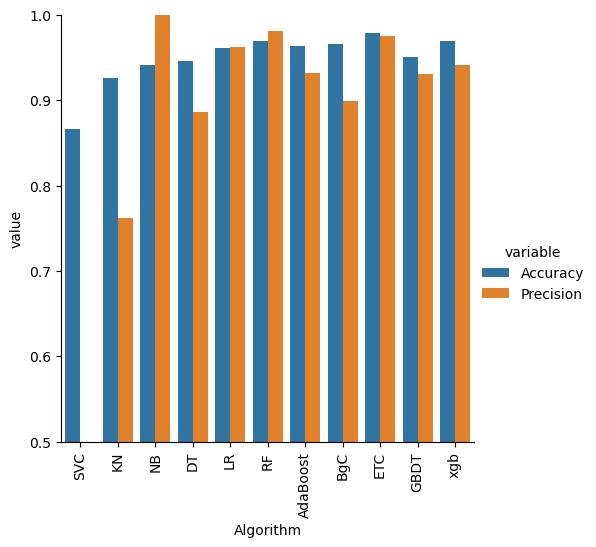

In [1717]:
sns.catplot(x = 'Algorithm' , y='value',
           hue = 'variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [1571]:
# model improve
#1. change the max_features parameter

In [1719]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'precision_max_ft_3000':precision_scores})

In [1721]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,precision_max_ft_3000
0,SVC,0.866538,0.000000,0.866538,0.000000
1,KN,0.926499,0.762712,0.926499,0.762712
2,NB,0.941006,1.000000,0.941006,1.000000
3,DT,0.945841,0.886792,0.945841,0.886792
4,LR,0.961315,0.962264,0.961315,0.962264
5,RF,0.969052,0.981818,0.969052,0.981818
6,AdaBoost,0.964217,0.931624,0.964217,0.931624
7,BgC,0.966151,0.899225,0.966151,0.899225
8,ETC,0.978723,0.975410,0.978723,0.975410
9,GBDT,0.950677,0.930693,0.950677,0.930693


In [1723]:
#voting classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [1725]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [1727]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [1728]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0,kernel='sigmoid',
                                 probability=True)),
                             ('nb',MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,random_state=2))],
                 voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [1729]:
y_pred = voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.941972920696325
Precision 1.0


In [1730]:
#Applying stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [1731]:
from sklearn.ensemble import StackingClassifier

In [1732]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [1733]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9729206963249516
Precision 0.9044117647058824


In [1741]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))